In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-may-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2021/train.csv
/kaggle/input/tabular-playground-series-may-2021/test.csv


In [2]:
train_data = pd.read_csv('../input/tabular-playground-series-may-2021/train.csv')
train_data.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


In [3]:
train_data.drop("id",axis=1,inplace=True)
train_data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,1,0,1,0,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,13,2,0,Class_1
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


<AxesSubplot:xlabel='target', ylabel='count'>

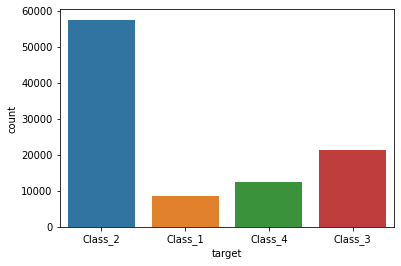

In [4]:
sns.countplot(train_data['target'])

In [5]:
train_data['target']=train_data['target'].replace({'Class_1':0, 'Class_2':1, 'Class_3':2, 'Class_4':3})
train_data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,1,0,1,0,0,0,0,0,...,0,0,21,0,0,0,0,0,0,1
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,13,2,0,0
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,1,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [6]:
X=train_data.drop('target',axis=1).values
y=train_data['target'].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=100 , stratify = y )

## CatBoostClassifier

In [8]:
from catboost import CatBoostClassifier

In [9]:
model_catboost=CatBoostClassifier(iterations=10000, loss_function='MultiClassOneVsAll',random_seed = 0)
model_catboost.fit(X_train,y_train, verbose = 1000)

0:	learn: 0.6813507	total: 118ms	remaining: 19m 42s
1000:	learn: 0.4465016	total: 48s	remaining: 7m 11s
2000:	learn: 0.4373713	total: 1m 35s	remaining: 6m 23s
3000:	learn: 0.4296064	total: 2m 22s	remaining: 5m 32s
4000:	learn: 0.4225770	total: 3m 8s	remaining: 4m 43s
5000:	learn: 0.4158240	total: 3m 54s	remaining: 3m 54s
6000:	learn: 0.4092519	total: 4m 40s	remaining: 3m 6s
7000:	learn: 0.4029404	total: 5m 25s	remaining: 2m 19s
8000:	learn: 0.3966943	total: 6m 12s	remaining: 1m 32s
9000:	learn: 0.3906941	total: 6m 58s	remaining: 46.5s
9999:	learn: 0.3848114	total: 7m 44s	remaining: 0us


In [10]:
pred_catboost=model_catboost.predict(X_test)
catboost_score =model_catboost.score(X_train,y_train)
catboost_pred_score =round(catboost_score*100,2)
catboost_pred_score

63.38

In [11]:
print(classification_report(y_test,pred_catboost))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2547
           1       0.59      0.97      0.73     17249
           2       0.42      0.10      0.16      6426
           3       0.43      0.00      0.00      3778

    accuracy                           0.58     30000
   macro avg       0.36      0.27      0.22     30000
weighted avg       0.48      0.58      0.45     30000



In [12]:
test_data=pd.read_csv('../input/tabular-playground-series-may-2021/test.csv')
test_data.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,...,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,...,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,6,0
3,100003,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,6,9,14,3
4,100004,0,0,0,0,0,0,1,0,4,...,1,0,0,0,0,0,0,0,0,0


In [13]:
test_id =test_data['id'].values 
test_prediction=test_data.drop('id',axis=1).values
prediction = model_catboost.predict_proba(test_prediction)
prediction

array([[0.08310652, 0.5291919 , 0.16459781, 0.22393864],
       [0.05670115, 0.78581018, 0.12204387, 0.03267796],
       [0.0557367 , 0.56104314, 0.2013613 , 0.16193431],
       ...,
       [0.08198748, 0.5752488 , 0.19729697, 0.13058607],
       [0.07919598, 0.61434732, 0.15945517, 0.13634133],
       [0.13782512, 0.48102847, 0.23285921, 0.13201487]])

In [14]:
sample_data = pd.read_csv('../input/tabular-playground-series-may-2021/sample_submission.csv')
sample_data.head()

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.25,0.25,0.25,0.25
1,100001,0.25,0.25,0.25,0.25
2,100002,0.25,0.25,0.25,0.25
3,100003,0.25,0.25,0.25,0.25
4,100004,0.25,0.25,0.25,0.25


In [15]:
sample_data.iloc[:,1:5] = prediction
sample_data

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.083107,0.529192,0.164598,0.223939
1,100001,0.056701,0.785810,0.122044,0.032678
2,100002,0.055737,0.561043,0.201361,0.161934
3,100003,0.065991,0.551720,0.176940,0.164567
4,100004,0.059576,0.640399,0.207117,0.084483
...,...,...,...,...,...
49995,149995,0.107768,0.679140,0.104971,0.073414
49996,149996,0.061216,0.705059,0.122026,0.111081
49997,149997,0.081987,0.575249,0.197297,0.130586
49998,149998,0.079196,0.614347,0.159455,0.136341


In [16]:
sample_data.to_csv('submission.csv',index=False)